# Modeling the Spread of an Infectious Disease 

This notebook will provide an initial model SIR for you to work on your assignment. Here is some key information: 

### Possible States

•	**Susceptible (S)**: Individuals that have not been infected with the disease, so they are susceptible to be infected within a given probability of disease transmission (i.e., transmission rate) and an average number of contacts per person per time (i.e., contact rate). 

•	**Infected (I)**: Individuals who are infected and can be infectious to other people. There is a probability of recovery and a probability of death associated to leaving this state.

•	**Recovered (R)**: Individuals that were already infected but are now recovered. These individuals cannot be infected anymore, since they developed antibodies. Note: This is not necessarily the case for COVID-19, as the evidence about it is inconclusive at this point, but this is the case for other diseases, and an assumption of this model. 

•	**Deceased (D)**: Individuals that were infected and died as a result of the disease.


### These are the variables that may affect our simulation output:

•	**Contact rate**: average number of contacts per person per day.

•	**Transmission Rate**: probability of disease transmission when a susceptible person gets in contact with an infected person.

•	**Recovery rate**: probability of recovery after being infected.

•	**Mortality rate**: probability of dying after being infected.

•	**Recovery Time**: average number of days that the disease stays in the body.




### Here is the **Mathematical Model** that will help us understand the spread of infectious diseases:

•	**NewInfections**: Infected * Contact rate * (Susceptibles/(Total Population))* Transmission rate

•	**NewRecoveries**: Infected*Recovery rate / Recovery Time.

•	**NewDeaths**: Infected*Mortality Rate / Recovery Time.

•	**Susceptibles**: Susceptibles - NewInfections

•	**Infected**: Infected + NewInfections – (NewRecoveries+NewDeaths)

•	**Recovered**: Recovered + NewRecoveries

•	**Deceased**: Deceased + NewDeaths

## Let's get started
First, we should define the variables that will work as input in our model

In [38]:
ContactRate=2.5
TransmissionRate=0.15
RecoveryRate= 0.85
MortalityRate= 0.15
RecoveryTime= 15
TotalPopulation=1000000

Now, we will create our variables that represent a starting point for our model. We assume that we have one person infected, and since our population is one million, the rest are still susceptible to be infected.



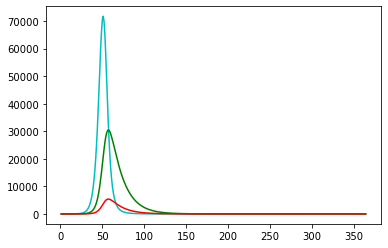

In [39]:
import matplotlib.pyplot as plt
Susceptible = 999999
Infected = 1
Deceased = 0
Recovered = 0
NewDeaths = 0
NewRecoveries = 0
NewInfections = 0


# We will use a loop to iterate through the 365 days of the year. 
# In each iteration, we will compute all the values for our model, and store them in specific arrays, 
# so we can later identify the maximums over the year.
days=list(range(1,365))
listSusceptible=[]
listInfected=[]
listRecovered=[]
listDeaths=[]

for i in range(1,365):
    NewInfections = Infected * ContactRate * (Susceptible/(TotalPopulation))* TransmissionRate
    NewRecoveries =  Infected*RecoveryRate / RecoveryTime
    NewDeaths = Infected*MortalityRate / RecoveryTime
    listInfected.append(NewInfections)
    listRecovered.append(NewRecoveries)
    listDeaths.append(NewDeaths)
    
    Susceptible = Susceptible - NewInfections
    listSusceptible.append(Susceptible)
    
    Infected += (NewInfections-(NewRecoveries+NewDeaths))
    Recovered += NewRecoveries
    Deceased += NewDeaths
    
plt.plot(days,listInfected, 'c-')
plt.plot(days,listRecovered, 'g-')
plt.plot(days,listDeaths, 'r-')
#plt.plot(days,listSusceptible, 'k-')
